#  vLife Virtusa

# LIVER DISEASE PREDICTION

###  Usecase Description

#### We are going to predict using logestic regression model whether a patient has liver disease or not based on certain features. We are going to check with the total proteins,albumin etc whether it is asscoiated with disease or not.

### Data Source

#### Data for LIVER DISEASE PREDICTION is available [here](https://www.kaggle.com/uciml/indian-liver-patient-records)


### Dataset Description

 * **Age** of the patients
 * **Gender** Sex of the patients
 * **Total_Bilirubin** Total Billirubin in mg/dL
 * **Direct_Bilirubin** Conjugated Billirubin in mg/dL
 * **Alkaline_Phosphotase** ALP in IU/L
 * **Alamine_Aminotransferase** ALT in IU/L
 * **Aspartate_Aminotransferase** AST in IU/L
 * **Total_Protiens** Total Proteins g/dL
 * **Albumin** Albumin in g/dL
 * **Albumin_and_Globulin_Ratio** A/G ratio
 * **Dataset** Label (patient has liver disease or not)


#### Importing the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import pickle
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset:**

In [3]:
patients=pd.read_csv('data/indian_liver_patient.csv')

In [4]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
patients.shape

(583, 11)

### Exploratary Data Analysis

In [6]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [7]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### DATA VISUALIZATION

> number of male and female using a countplot.

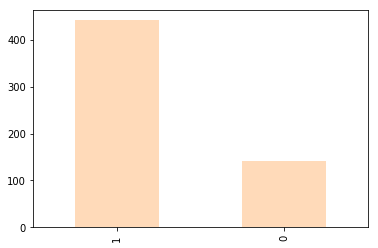

In [8]:
patients['Gender'].value_counts().plot.bar(color='peachpuff')

> countplot of Target column:

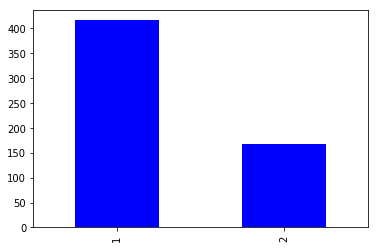

In [9]:
patients['Dataset'].value_counts().plot.bar(color='blue')

In [10]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

**There are 4 null values in the Albumin and Globulin Ratio column.**

> fill these null values by imputing the mean of that column.

In [11]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [12]:
patients=patients.fillna(0.94)

In [13]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

> age group of the patients.

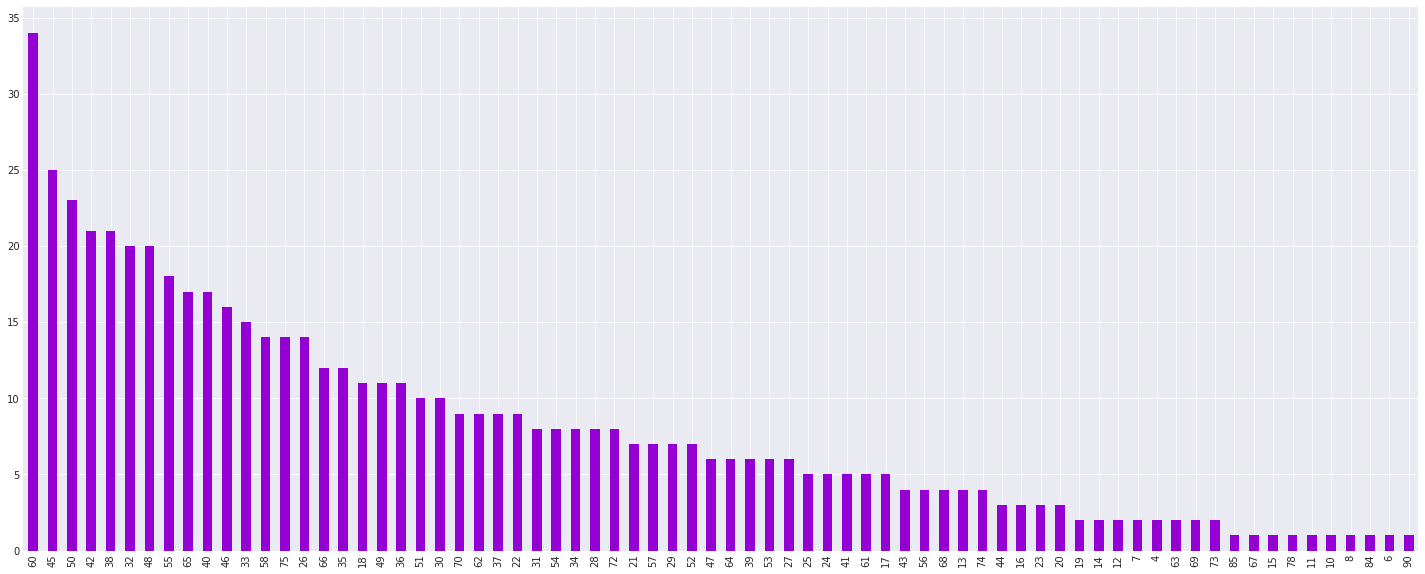

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

> pairplot of patients based on Gender.

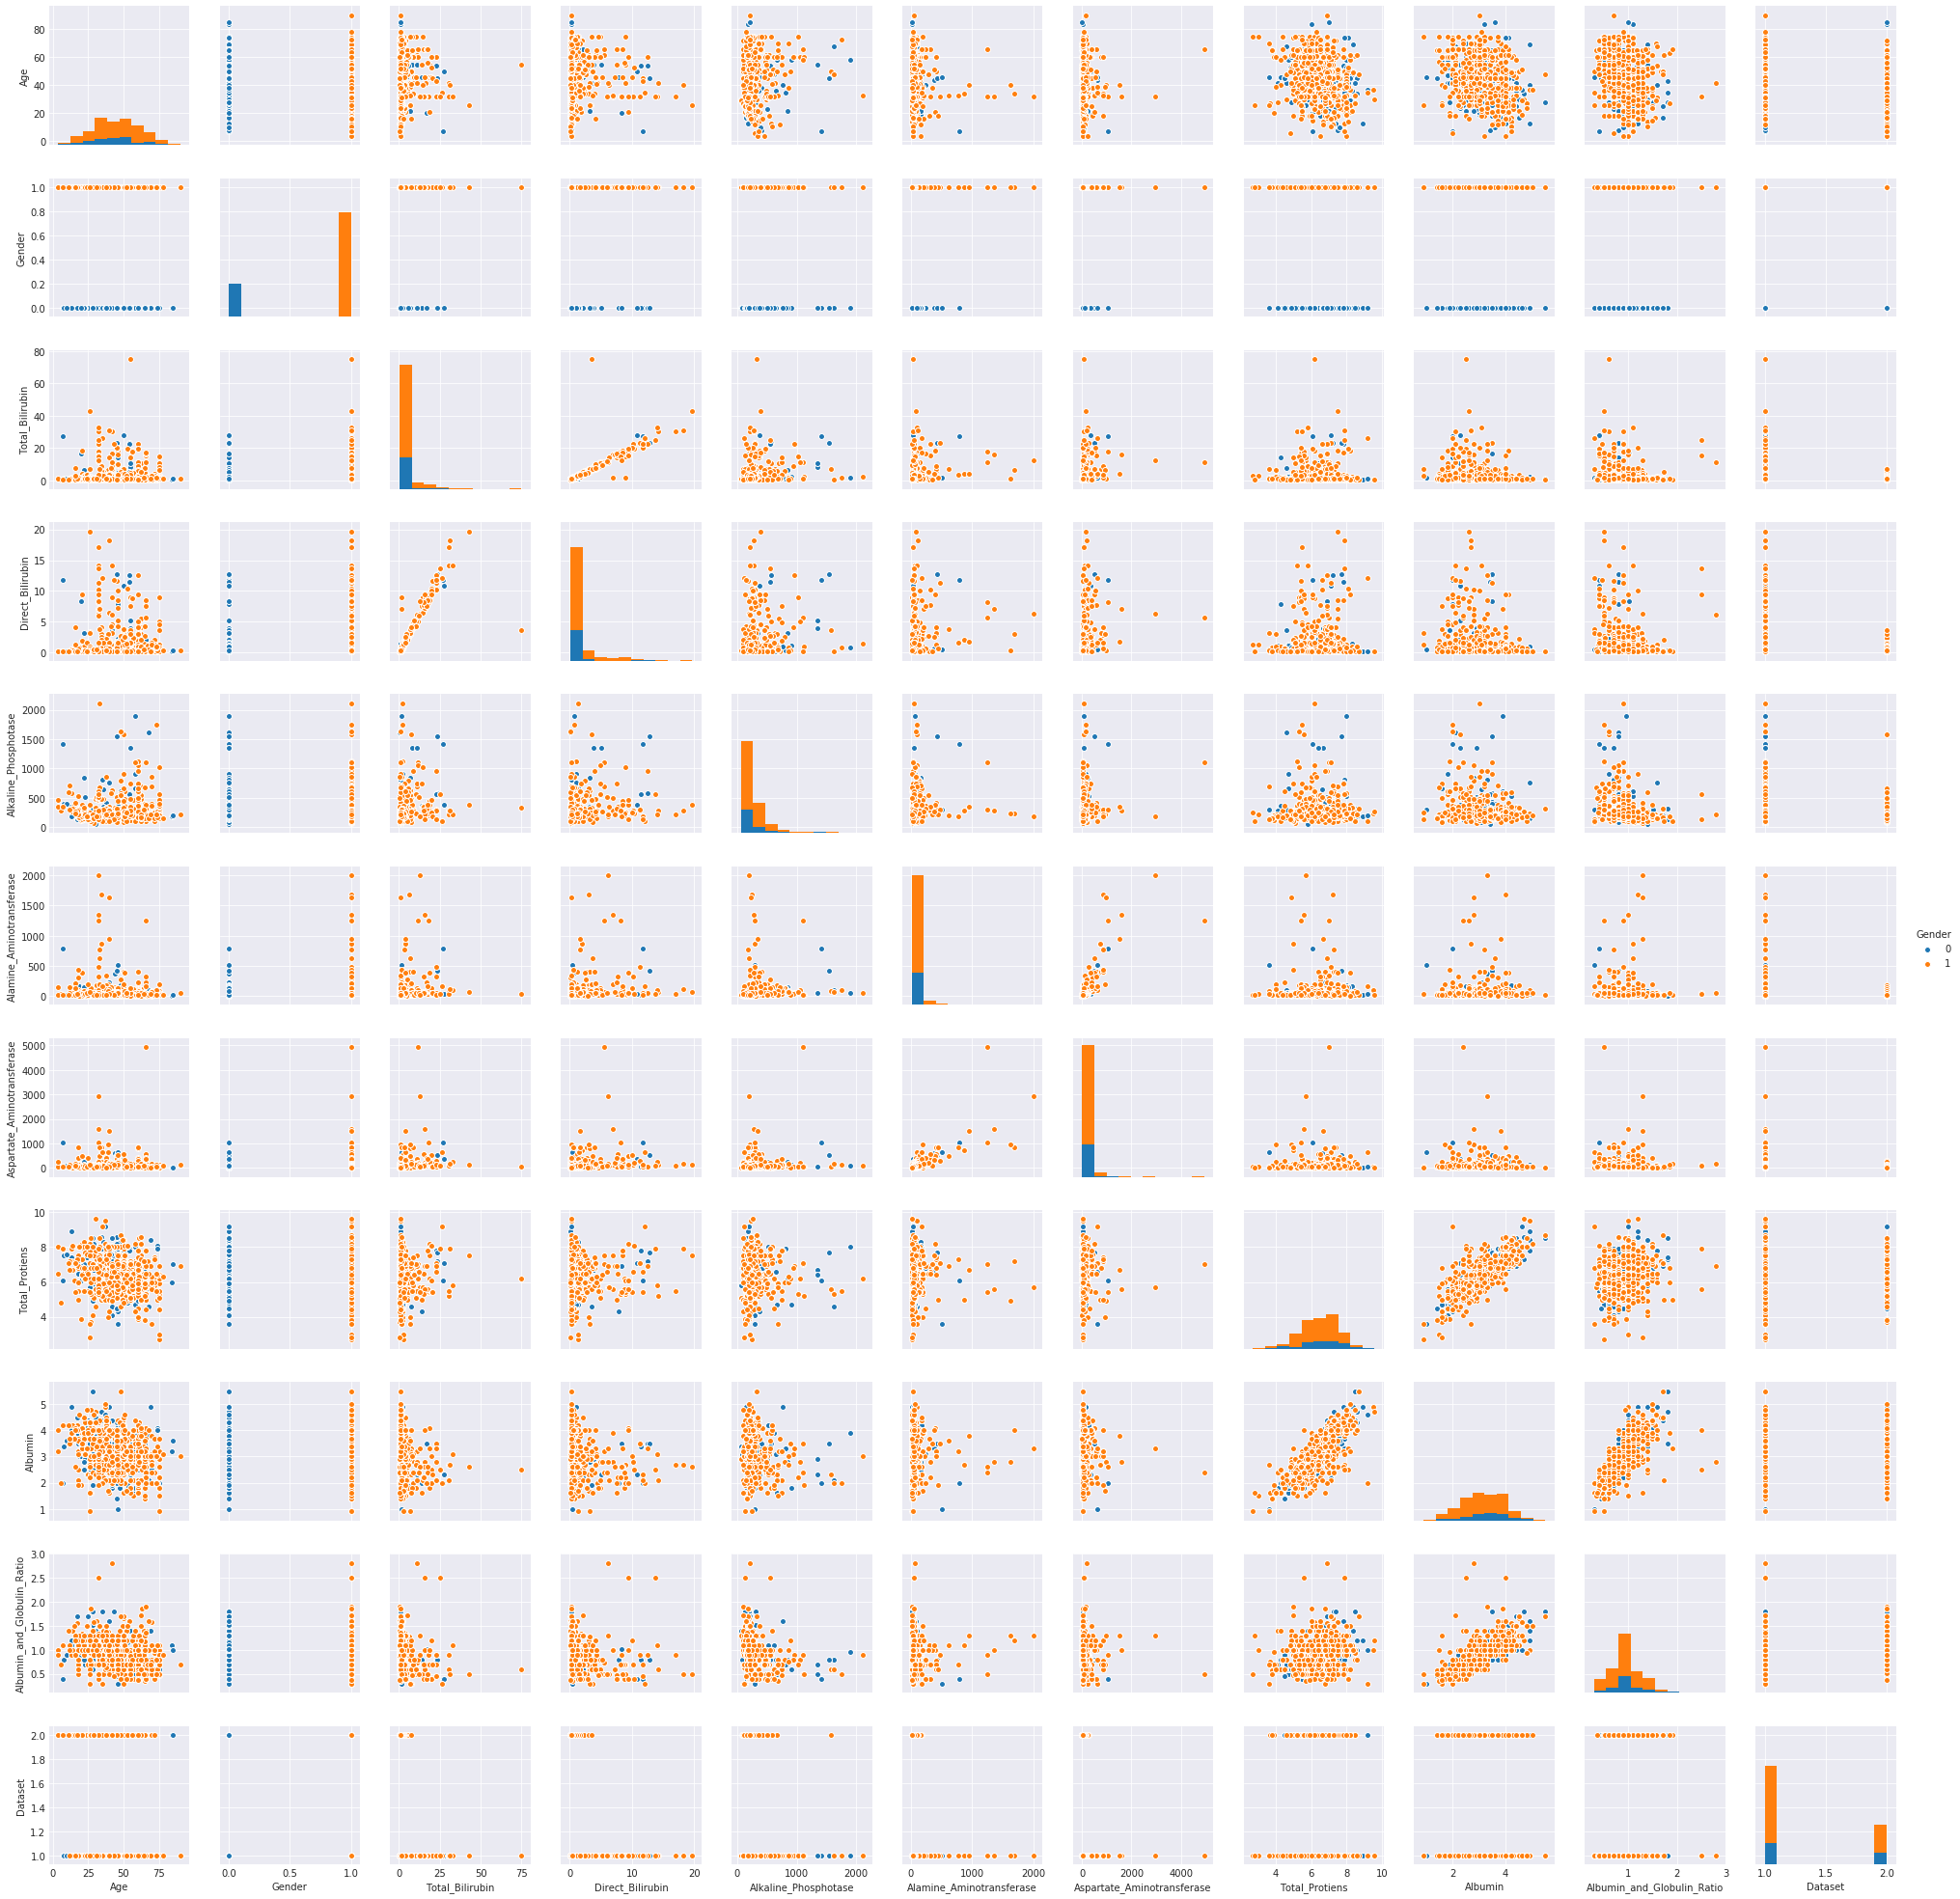

In [15]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

> compare the albumin and albumin and globulin ratio by a scatterplot.

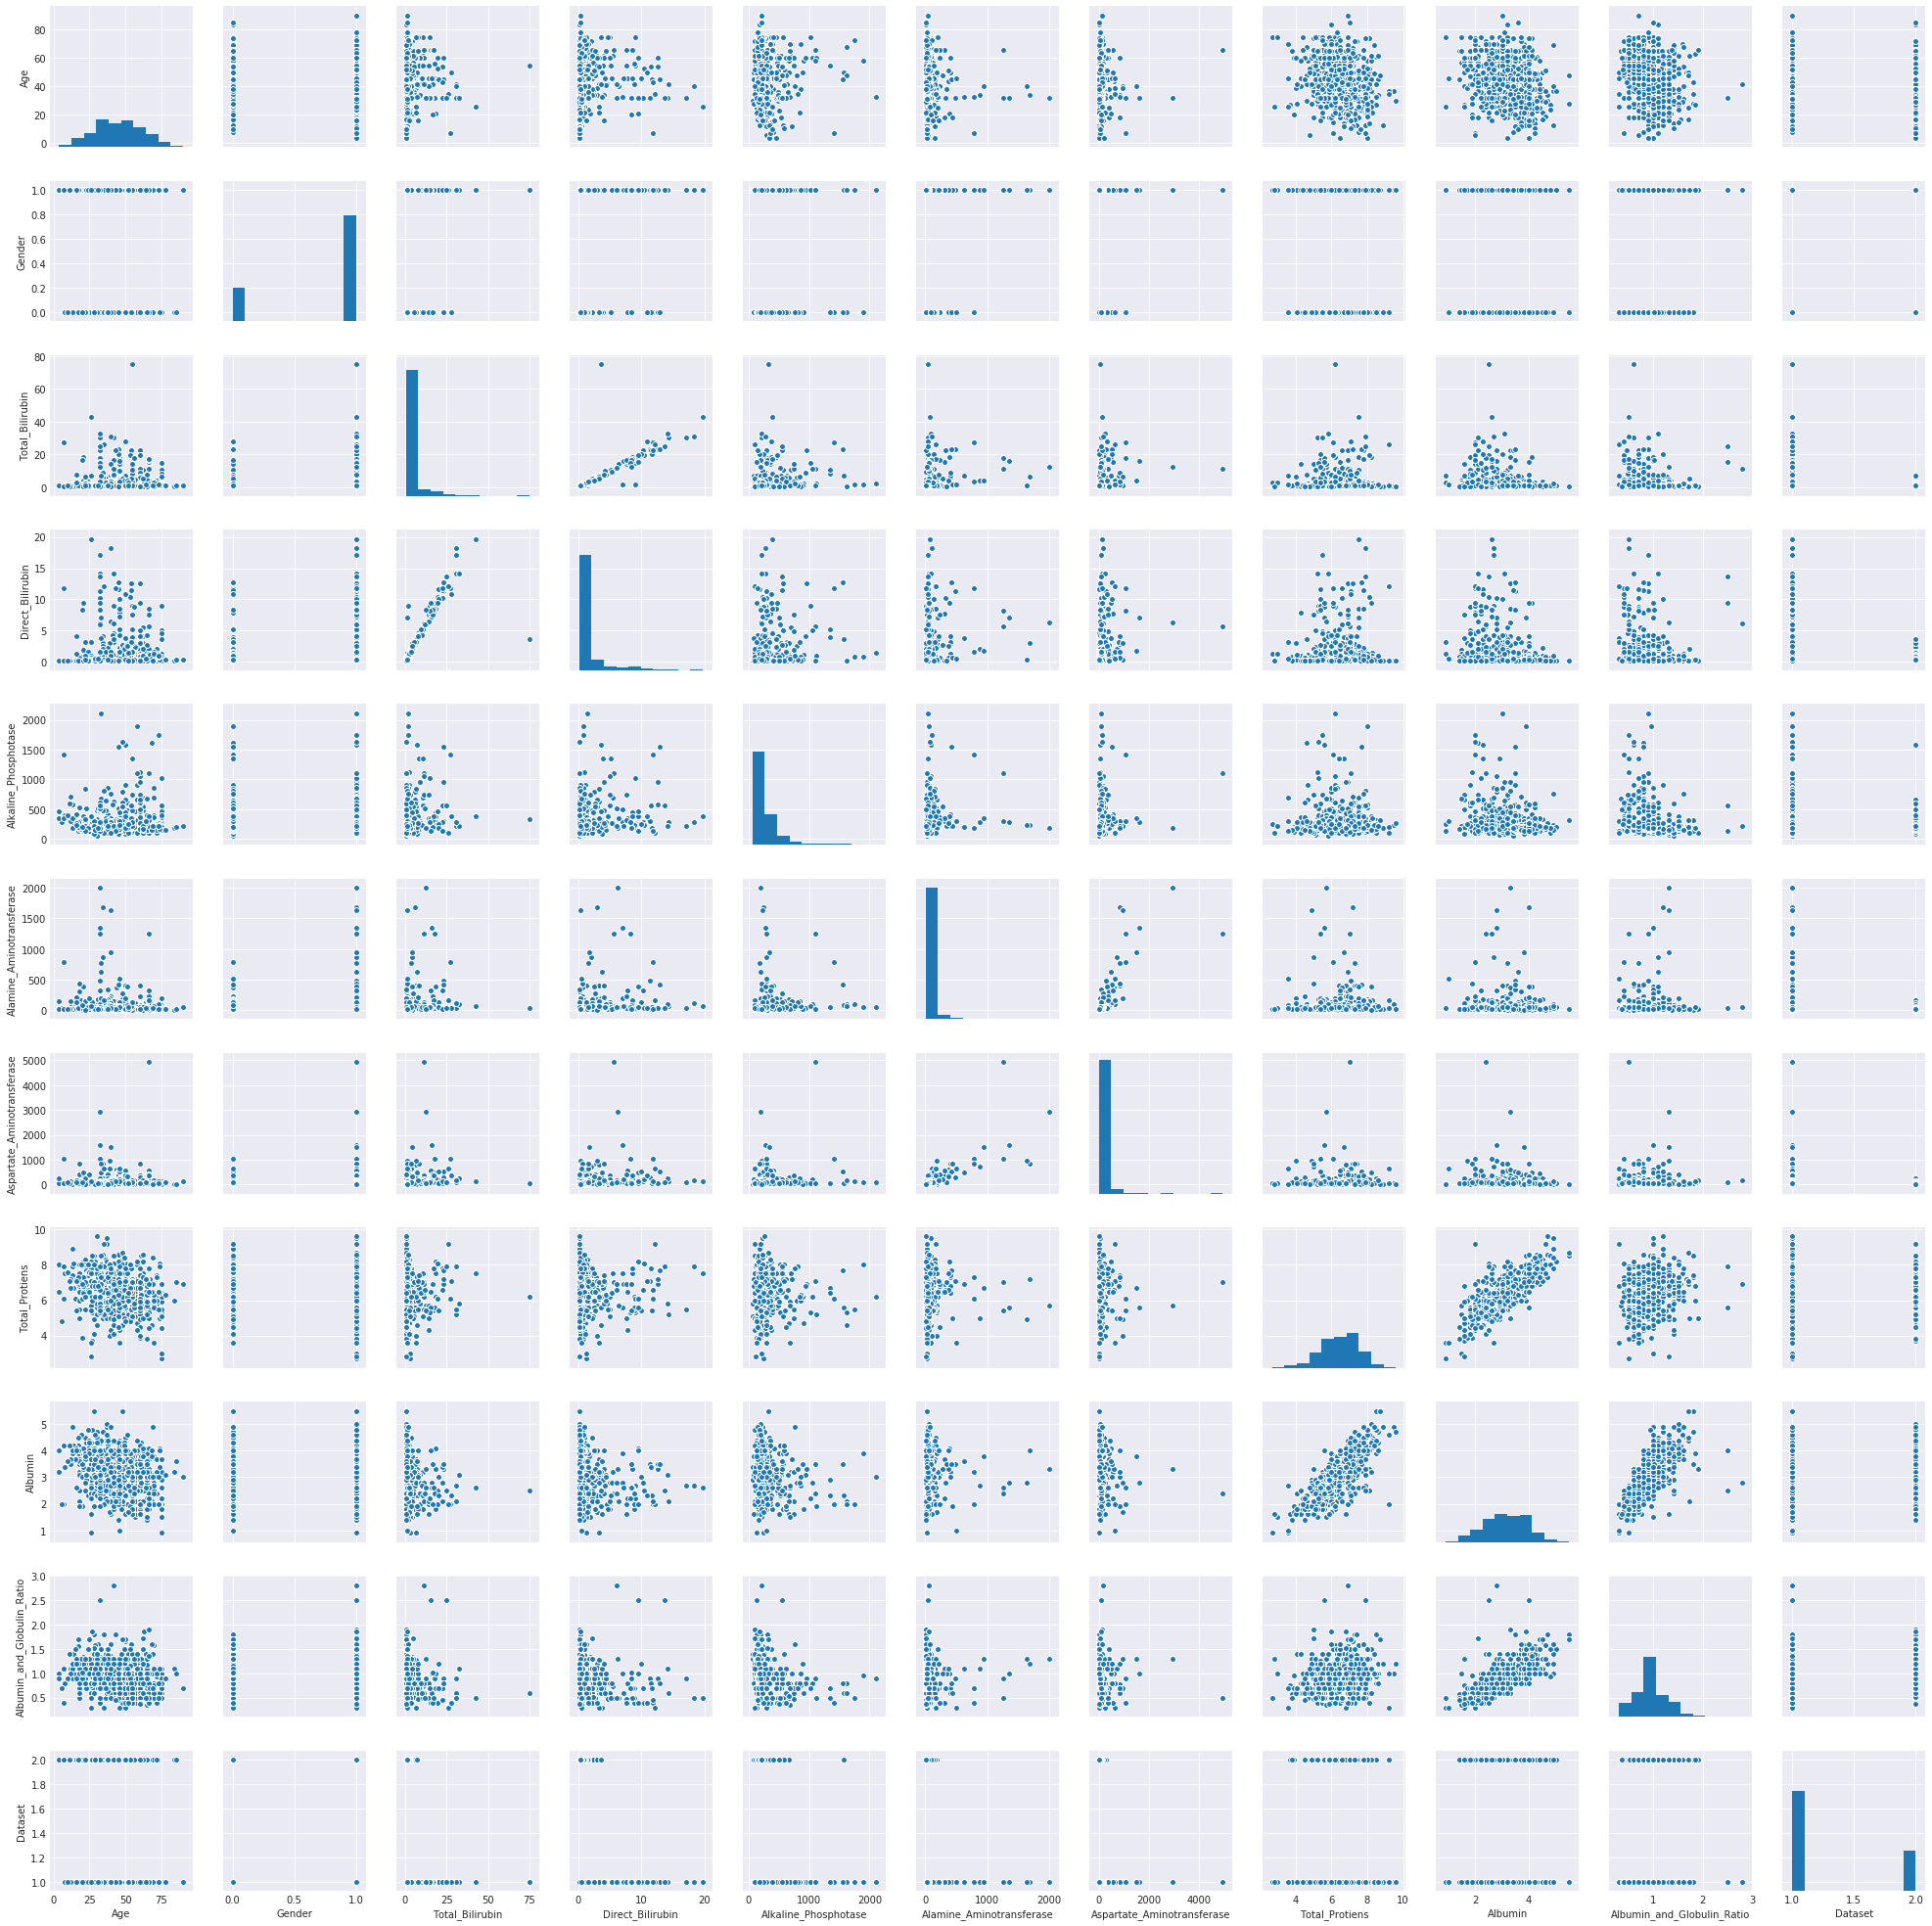

In [16]:
sns.pairplot(patients)

> compare the Gender based on the Protein Intake.


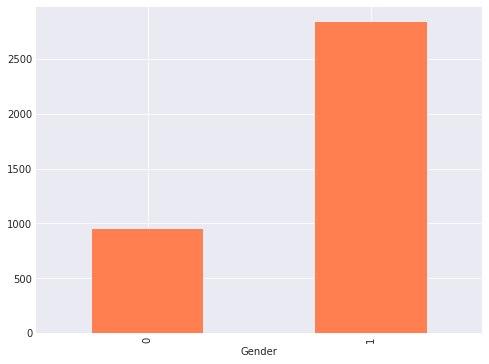

In [19]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

> compare male and female based on Albumin Level.

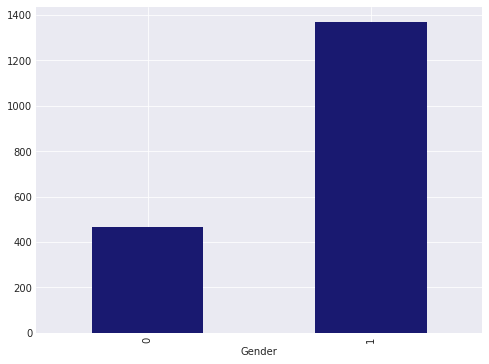

In [20]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

> compare them based on the Bilirubin content

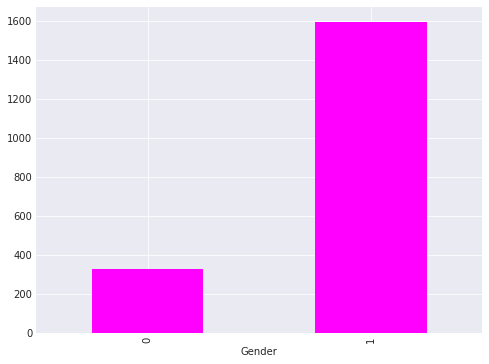

In [21]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

> correlation between the features using a heatmap:

In [22]:
corr=patients.corr()

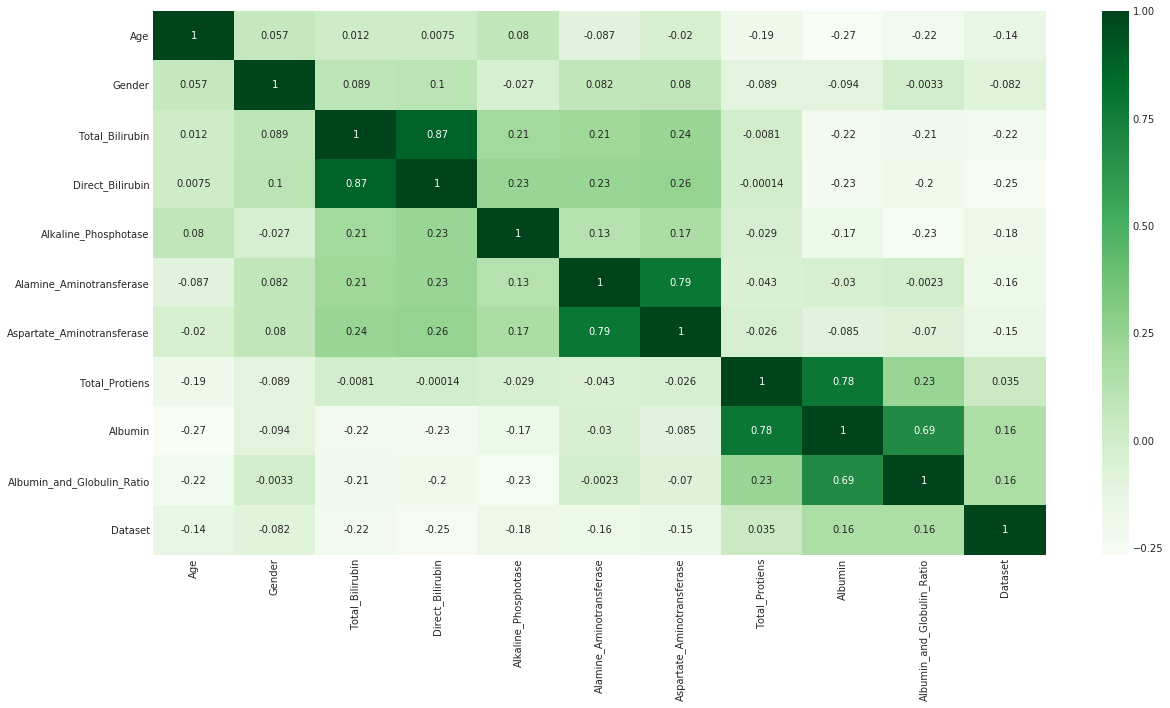

In [23]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

## Predictive Models
#### Building LOGISTIC REGRESSION Model 

In [25]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [26]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [48]:
X_train.iloc[:1,:].to_numpy



<bound method DataFrame.to_numpy of     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
22   62       1              6.8               3.0                   542   

    Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
22                       116                          66             6.4   

    Albumin  Albumin_and_Globulin_Ratio  
22      3.1                         0.9  >

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Evaluation

#### Using Cross Validation

**Accuracy of Logistic Regression Model.**

In [29]:
kfold = KFold(n_splits=5,random_state=42)
logmodel = LogisticRegression(C=1, penalty='l1')
results = cross_val_score(logmodel, X_train,y_train,cv = kfold)
print(results)
print("Accuracy:",results.mean()*100)

[0.68292683 0.73170732 0.63414634 0.71604938 0.82716049]
Accuracy: 71.83980728696177


### Model Prediction

In [37]:
pred = logmodel.predict(X_test)

In [39]:
pred

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

### Save the Model

In [40]:
with open('LiverDiagnosisFinal_model.pickle', 'wb') as handle:
    pickle.dump(logmodel, handle)

## END